# TP2 : Séparateurs à Vaste Marge

## 1 Données

Nous utiliserons la base de données breastcancer et utiliser la fonction fournie.



In [1]:
import numpy as np
import random

def load_breastcancer(filename):
    """
    Cette fonction lit le fichier filename, par exemple
    filename = 'wdbc_M1_B0.data'
    Elle retourne 
    X : une matrice de caracteristiques
    y : un vecteur des classes tel que si y[i] = 1, la tumeur est maligne
        et si y[i] = -1, la tumeur est benigne

    Pour plus d'infos sur la base de donnees,
    https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Prognostic%29
    """

    data = np.loadtxt(filename, delimiter=',')

    # la colonne 0 ne nous interesse pas ici
    y = data[:, 1] * 2 - 1
    X = data[:, 2:]

    # Standardisation de la matrice
    X = X - np.mean(X, axis=0)
    X = X / np.std(X, axis=0)

    return X, y



In [2]:
X,Y=load_breastcancer('wdbcM1B0.data')

## 2 Méthode du sous-gradient

### Question 2.1 

Nous avons le problème suivant :

$$min_{v \in \mathbb{R}^{m}, a \in \mathbb{R}, \xi \in \mathbb{R}^{n}} \frac{1}{2} \sum_{j=1}^{m} v_{j}^{2} + c \sum_{i=1}^{n} \xi_{i}$$
$$\xi_{i} \ge 0 ,\; \forall i \in \{ 1,...,n \}$$
$$\xi_{i} \ge 1 - y_{i}(x_{i}^{T}v + a), \; \forall i \in \{ 1,...,n \}$$

où $c=1$.

Notons $f(v,a,\xi) = \frac{1}{2} \sum_{j=1}^{m} v_{j}^{2} + c \sum_{i=1}^{n} \xi_{i}$ définie sur $D_{f}=\{ \xi : \xi_{i} \ge 0 ,\xi_{i} \ge 1 - y_{i}(x_{i}^{T}v + a), \; \forall i \in \{ 1,...,n \} \}$. $f(v,a,.)$ est croissante sur $D_{f}$. 

Notons $\xi_{min} = (max(0,1 - y_{i}(x_{i}^{T}v + a))_{1 \le i \le n}$. On a $f(v,a,\xi) \ge f(v,a,\xi_{min})$ par croissance de $f(v,a,.)$.

Donc $min_{v \in \mathbb{R}^{m}, a \in \mathbb{R}, \xi \in \mathbb{R}^{n}} f(v,a,\xi) \ge min_{v \in \mathbb{R}^{m}, a \in \mathbb{R}, \xi \in \mathbb{R}^{n}} f(v,a,\xi_{min}) = min_{v \in \mathbb{R}^{m}, a \in \mathbb{R}} f(v,a,\xi_{min}) \qquad (1)$

Par ailleurs, pour toute fonction $g : A \times B \rightarrow \mathbb{R}$, $min_{a,b} g(a,b) \le min_{a} g(a,\beta) \; \forall \beta \in B$. En prenant $g=f$, $A=\mathbb{R}^{m} \times \mathbb{R}$ et $B=\mathbb{R}^{n}$ :

$$min_{v \in \mathbb{R}^{m}, a \in \mathbb{R}, \xi \in \mathbb{R}^{n}} f(v,a,\xi) \le min_{v \in \mathbb{R}^{m}, a \in \mathbb{R}, \xi \in \mathbb{R}^{n}} f(v,a,\xi_{min}) = min_{v \in \mathbb{R}^{m}, a \in \mathbb{R}} f(v,a,\xi_{min}) \qquad (2)$$

Ainsi, d'après (1) et (2), $min_{v \in \mathbb{R}^{m}, a \in \mathbb{R}, \xi \in \mathbb{R}^{n}} f(v,a,\xi) = min_{v \in \mathbb{R}^{m}, a \in \mathbb{R}, \xi \in \mathbb{R}^{n}} f(v,a,\xi_{min}) = min_{v \in \mathbb{R}^{m}, a \in \mathbb{R}} f(v,a,\xi_{min})$ et donc les deux problèmes sont équivalents

## Question 2.2

In [3]:
import matplotlib.pyplot as plt

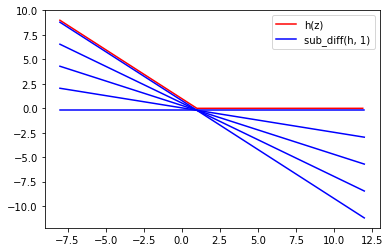

In [4]:
def h(z):
    return np.maximum(np.zeros(len(z)),1-z)

z=np.arange(-8,12,0.1)
plt.figure()
plt.plot(z,h(z),label='h(z)',color='red')
plt.plot([-8,12], [-0.2,-.2], color = 'blue', label = "sub_diff(h, 1)")
plt.plot([-8,12], [8.8, -11.2], color = 'blue')
plt.plot([-8,12], [4.3, -5.7], color = 'blue')
plt.plot([-8,12], [9*3/4-0.2,-11*3/4 -0.2], color = 'blue')
plt.plot([-8,12], [9/4-0.2,-11/4 -0.2], color = 'blue')
plt.legend()
plt.show()


h est différentiable partout sauf en 1 et on a : $\forall z \in \mathbb{b}, z \neq 1, \partial h(z) = \frac{\partial h(z)}{\partial z} = sgn(1-z)$. Pour $z=1$, on constate que toutes les pentes entre -1 et 1 conviennent. 

## Question 2.3

Définissons N tel que  $N(v,a)=\frac{1}{2} ||v||^{2} = \frac{1}{2} \sum_{i=1}^{m} v_{i}^{2}$. N est bien séparable (et convexe).

Définissons H tel que $H(z) = \sum_{i=1}^{n} h(z_{i})$. H est de même séparable (convexe et différentiable également).

Enfin définissons M tel que 
$M= 
\begin{pmatrix}
y_{1} & &0 \\
& \ddots & \\
0 & & y_{n}
\end{pmatrix} 
\times 
\begin{pmatrix}
X, & \begin{pmatrix} 1\\ \vdots \\ 1 \end{pmatrix} \\
\end{pmatrix}$
 M est un opérateur linéaire et on a : $M(v,a)=\begin{pmatrix} y_{1}(x_{1}^{T}v+a) \\ \vdots \\ y_{n}(x_{n}^{T}v+a) \end{pmatrix}$
 
 M est bien une application linéaire.
 
Ainsi, on a bien $f(v,a)=N(v, a) +cH(M(v, a))$.

D'après la proposition 2.4.2 du cours, les conditions étant réunies, on a :

$$\partial f(v,a) = \partial N(v,a) + c M^{T} \partial H(M(v,a)) $$

N étant différentiable, on a $\partial N(v,a) = \{ (\nabla N(v), \nabla N(a)) \}$, i.e. $\partial N(v,a) = \{ (v,0) \}$. 

Par ailleurs, H étant séparable, on a $\partial H(z) = \partial h(z_{1}) \times ... \times \partial h(z_{n})$.

## Question 2.4 



In [5]:
c=1
n=len(Y)
Mat=np.diag(Y) @ np.concatenate((X,np.ones((n,1))),axis=1)

def N(va):
    return 0.5*np.sum(va[:-1]**2)

def H(z):
    return np.sum(h(z))

def M(va):
    return Mat @ (va)
    
def f(va):
    return N(va)+c*H(M(va))

def d_N(va):
    va[len(va)-1]=0
    return va

def d_H(z):
    result=[]
    m=len(z)
    for i in range(m):
        if z[i]<1:
            result.append((-1))
        if z[i]>1:
            result.append((1))
        if z[i]==1:
            result.append(random.randrange(-1,0)) #We select a subgradient
    return result


def d_f(va):
    #return an element of the subgradient
    return [d_N(va)[i]+(np.transpose(c*Mat) @ d_H(M(va)))[i] for i in range(len(d_N(va)))]

## Question 2.5

In [6]:
def subgradient_method(va0,nombre_iter):
    vak=va0
    list_gamma=[]
    list_x=[vak]
    res=[0]*len(vak)
    for k in range(nombre_iter):
        gk=d_f(vak)
        gammak=1/(k+1)
        list_gamma.append(gammak)
        temp=[i*gammak for i in gk]
        for i in range(len(vak)):
            vak[i]=vak[i]-temp[i]
        list_x.append(vak)
        for i in range(len(res)):
            res[i]=np.multiply(list_gamma,np.array(list_x[:-1])[:,i]).sum(0)/np.sum(list_gamma)
    return np.array(res)

minimiseur=subgradient_method([0]*31,1000)

print('Minimiseur obtenu=', minimiseur)
print('\nMinimum= {:.4f}.\n'.format(f(minimiseur)))

Minimiseur obtenu= [-0.2563311   0.13318085 -0.24154662 -0.1370914  -0.09593255 -0.59240781
  0.22236272  0.30909915 -0.07430238 -0.1197459   0.23308399 -0.30393255
 -0.09976162 -0.02486787  0.01301957 -0.14483386 -0.02199856 -0.20006718
 -0.20131629  0.11058338  0.14314164  0.20896945  0.01168679  0.00263704
  0.17733056 -0.67268217 -0.00222325 -0.19902352  0.16136092 -0.18113663
  0.115     ]

Minimum= 1018.2140.



## Méthode du sous-gradient stochastique

### Question 3.1

On a :
    
$$\mathbb{E}[f_{I}(v,a)]=\frac{1}{2} \sum_{j=1}^{m} v_{j}^{2} + c n \mathbb{E}[max(0,y_{I}(x_{I}^{T}v+a))]  \qquad par linéarité$$

Puis : 

$$\mathbb{E}[max(0,y_{I}(x_{I}^{T}v+a))]= \sum_{i=1}^{n} \mathbb{P}(I = i) max(0,y_{i}(x_{i}^{T}v+a)) = \frac{1}{n} \sum_{i=1}^{n}max(0,y_{i}(x_{i}^{T}v+a))$$

Donc on a bien $$\mathbb{E}[f_{I}(v,a)]=f(v,a)$$

## Question 3.2

Posons $\tilde{M_{i}}=y_{i}(x_{i}^{T},1)$ opérateur linéaire. On a : $\tilde{M_{i}}(v,a)=y_{i}(x_{i}^{T}v+a)$

On a donc $f_{i}(v,a)=N(v,a) + c n h(\tilde{M_{i}}(v,a))$.

Toujours selon la propriété 2.4.2 du cours, nous avons :

$$\partial f_{i}(v,a) = \partial N(v,a) + cn \tilde{M_{i}}^{T} \partial h(\tilde{M_{i}}(v,a))$$

et donc :

$$\partial f_{i}(v,a) = 
\left\{
    \begin{array}{ll}
        (v,0) - cn\tilde{M_{i}}^{T} & \mbox{si } \tilde{M_{i}}(v,a) < 1 \\
        (v,0) + \alpha cn\tilde{M_{i}}^{T}, \, \alpha \in [-1,0] & \mbox{si } \tilde{M_{i}}(v,a) = 1 \\
        (v,0) & \mbox{si } \tilde{M_{i}}(v,a) > 1 \\
    \end{array}
\right.
$$

## Question 3.3



In [7]:
def d_h_M_tilde(va,i):
    if Mat[i,:] @ va <1:
        return [(-c)*Mat.shape[0]*elem for elem in Mat[i,:]]
    if Mat[i,:] @ va == 1:
        return [np.randrange(-1,0)*c*Mat.shape[0]*elem for elem in Mat[i,:]]
    else:
        return 0
    
def d_fi(va,i):
    if d_h_M_tilde(va,i)==0:
        return d_N(va)
    else:
        return d_N(va)+np.array(d_h_M_tilde(va,i))

def sous_grad_stoch(va0,N):
    n=Mat.shape[0]
    vak=va0
    gamma_sum=0
    ponder=0
    for k in range(N):
        gammak=1/(k+1)
        gamma_sum+=gammak
        i=random.randint(1,n)
        gk=d_fi(vak,i)
        ponder+=gammak*vak
        vak-=gammak*gk
    return (1/gamma_sum)*ponder
        
minim=sous_grad_stoch(np.zeros(31),200)
print('Minimiseur obtenu=', minim)

Minimiseur obtenu= [  81.08788803 -166.67497211   84.04802072   74.88354104  173.34160931
  117.56134646   84.8694345   110.23769798  -33.91152798   80.93737663
   97.15772791   42.42439143   83.27552667   68.15685339   95.57959444
   39.75960435   43.68145145  113.91564196   51.87390324   49.66290064
   90.39176264 -110.44103393   84.85877802   78.58894042  164.70860832
   68.55675419   79.0145516   138.55027997    4.54540611   63.90496041
    0.        ]


In [8]:
minimum=f(minim)
print('Minimum associé au problème 2 =', minimum)

Minimum associé au problème 2 = 185525.4649753602


Le minimum et le minimiseur peuvent être susceptible de varier dans la mesure où nous prenons un élément aléatoire de la sous-différentielle. 

## Méthode du lagrangien augmenté

### Question 4.1

Pour le problème (1), nous avons les conditions : $g(v,a,\xi)=(\xi_{1},...,\xi_{n},1-\xi_{1}-y_{1}(x_{1}^{T}v+a), 1-\xi_{n}-y_{n}(x_{n}^{T}v+a)) \leq 0$

Le lagrangien associé au problème (1) est donné par :

$$L : \mathbb{R}^{m} \times \mathbb{R} \times \mathbb{R}^{n} \times \mathbb{R}^{2n} \rightarrow \mathbb{R}$$

$$(v,a,\xi,\phi) \rightarrow f(v,a,\xi) + <\phi,g(v,a,\xi)> -\iota_{\mathbb{R}^{2n}}(\phi)$$

C'est-à-dire :

$$L(v,a,\xi,\phi)=\frac{1}{2} \sum_{j=1}^{m} v_{j}^{2} + c \sum_{i=1}^{n} \xi_{i} - \sum_{i=1}^{n}\phi_{i} \xi_{i} + \sum_{i=1}^{n}\phi_{i+n}(1-\xi_{i}-y_{i}(x_{i}^{T}v+a))$$

## Question 4.2

Fixons $\phi$. Pour $x>-\frac{\phi}{\rho}$, $g(x,\phi)=\frac{\rho x^{2}}{2} + x \phi$. Donc $g(.,\phi)$ est dérivable sur $]-\frac{\phi}{\rho}, \infty[$ et $\nabla_{x}g(x,\phi)=\rho x + \phi$

De même, sur $]-\infty,-\frac{\phi}{\rho}[$, $g(x,\phi)=-\frac{1}{2\rho} \phi^{2}$ et donc $\nabla_{x}g(x,\phi)=0$

Par ailleurs, $lim_{x \rightarrow -\frac{\phi}{\rho}_{-}} \nabla_{x}g(x,\phi) = lim_{x \rightarrow -\frac{\phi}{\rho}_{+}} \nabla_{x}g(x,\phi) =0$. Donc $g(.,\phi)$ est dérivable sur $\mathbb{R}$ et on a :

$$\nabla_{x}g(x,\phi)=
\left\{
    \begin{array}{ll}
        0 & \mbox{si } x \leq -\frac{\phi}{\rho} \\
        \rho x + \phi & \mbox{si } x>-\frac{\phi}{\rho} \\
    \end{array}
\right.$$

i.e : $$\nabla_{x}g(x,\phi)=\rho max(0,x+\frac{\phi}{\rho})$$

De même, pour $g(x,.)$ on prolonge par continuité $\nabla_{\phi}g$ et on a :

$$\nabla_{\phi}g(x,\phi)=
\left\{
    \begin{array}{ll}
        0 & \mbox{si } \phi \geq -x\rho \\
        -\frac{\phi}{\rho} & \mbox{si } \phi < -x\rho \\
    \end{array}
\right.$$

i.e. :
$$\nabla_{\phi}g(x,\phi)=max(-\frac{\phi}{\rho},x)$$


## Question 4.3

La fonction $x \longmapsto g(x,\phi)$ pour $\phi$ fixé a pour dérivée $\nabla_{x}g(.,\phi)$ qui est croissante d'après l'expression obtenue à la question précédente. Par conséquent, $x \longmapsto g(x,\phi)$ est convexe.

De même $\phi \longmapsto g(x,\phi)$ pour x fixé a pour dérivée $\nabla_{\phi}g(x,.)$ qui est décroissante d'après l'expression obtenue à la question précédente. Par conséquent, $\phi \longmapsto g(x,\phi)$ est concave.

## Question 4.4

Déterminons les expressions des gradients nécessaires. On a :

$$\nabla_{v}L(v,a,\xi,\phi_{k},\psi_{k})=v- (
\begin{pmatrix}
y_{1} & &0 \\
& \ddots & \\
0 & & y_{n}
\end{pmatrix} 
\times
X)^{T}
\begin{pmatrix} \nabla_{x}g(1-\xi_{1}-y_{1}(x_{1}^{T}v+a),\psi_{1})\\ \vdots \\ \nabla_{x}g(1-\xi_{n}-y_{n}(x_{n}^{T}v+a),\psi_{n})
\end{pmatrix} $$

$$\nabla_{a}L(v,a,\xi,\phi_{k},\psi_{k})=-\sum_{i=1}^{n} y_{i} \nabla_{x}g(1-\xi_{i}-y_{i}(x_{i}^{T}v+a),\psi_{i})$$

et 

$$\nabla_{\xi}L(v,a,\xi,\phi_{k},\psi_{k})=
\begin{pmatrix} 
c-\nabla_{x}g(-\xi_{1},\phi_{1})-\nabla_{x}g(1-\xi_{1}-y_{1}(x_{1}^{T}v+a),\psi_{1})\\ \vdots \\ c-\nabla_{x}g(-\xi_{n},\phi_{n})-\nabla_{x}g(1-\xi_{n}-y_{n}(x_{n}^{T}v+a),\psi_{n})
\end{pmatrix}$$

In [9]:
rho=2
epsilon=1

def g(x,phi):
    return (-(phi**2)/(2*rho))+rho*(np.maximum(0,x+(phi/rho))**2)/rho

def L_rho(v,a,xi,phi,psi):
    return 0.5*np.sum(v**2)+c*np.sum(xi)+np.sum(g(-xi,phi))+np.sum(g(-xi+1-M(np.insert(v, len(v)-1, a, axis=0)),psi))
    
def nabla_x_g(x,phi):
    return rho*np.maximum(0,x+(phi/rho))

def gradient_lin(v0,a0,xi0,phi,psi):
    vk=v0
    ak=a0
    xik=xi0
    b=10
    a=0.5
    x = 1-xik-np.dot(np.diag(Y), np.dot(X, vk) + a)
    grad_v=vk-np.dot(np.dot(np.diag(Y), X).T, nabla_x_g(x, psi))
    grad_a=-np.sum(Y * nabla_x_g(x,psi))
    grad_xi=c - nabla_x_g(-xik, phi) - nabla_x_g(x, psi)
    while np.sum(grad_v**2)+grad_a**2+np.sum(grad_xi**2)>epsilon:
        l=1
        v_plus=vk-(b*(a**l))*grad_v
        a_plus=ak-(b*(a**l))*grad_a
        xi_plus=xik-(b*(a**l))*grad_xi
        while L_rho(v_plus,a_plus,xi_plus,phi,psi)>L_rho(vk,ak,xik,phi,psi)+np.sum(grad_v*(v_plus-vk))+np.sum(grad_a*(a_plus-ak))+np.sum(grad_xi*(xi_plus-xik))+0.5*(b*(a**l))*(np.sum((v_plus-vk)**2)+np.sum((a_plus-ak)**2)+np.sum((xi_plus-xik)**2)):
            l+=1
        gammak=b*(a**l)
        vk-=gammak*grad_v
        ak-=gammak*grad_a
        xi_plus=gammak*grad_xi
        x = 1-xik-np.dot(np.diag(Y), np.dot(X, vk) + a)
        grad_v=vk-np.dot(np.dot(np.diag(Y), X).T, nabla_x_g(x, psi))
        grad_a=-np.sum(Y * nabla_x_g(x,psi))
        grad_xi=c - nabla_x_g(-xik, phi) - nabla_x_g(x, psi)
    return vk,ak,xik

## Question 4.5

In [10]:
def nabla_phi_psi_L(v,a,xi,phi,psi):
    nabla_phi=np.maximum(-(1/rho)*phi,-xi)
    x = 1-xi-np.dot(np.diag(y), np.dot(X, v) + a)
    nabla_psi=np.maximum(-(1/rho)*phi,x)
    return nabla_phi,nabla_psi

## Question 4.6

In [ ]:
def augmented_lagrangian(v,a,xi,phi,psi,N):
    vk,ak,xik,psik,phik=v,a,xi,psi,phi
    for i in range(N):
        vk,ak,xik=gradient_lin(vk,ak,xik,phik,psik)
        nabla_phi,nabla_psi=nabla_phi_psi_L(vk,ak,xik,phik,psik)
        phik+=rho*nabla_phi
        psik+=rho*nabla_psi
    return vk,ak,xik,phik,psik

augmented_lagrangian(np.zeros((30,)),0,np.zeros((569,)),np.zeros((569,)),np.zeros((569,)),2000)

# 5 Comparaison

## Question 5.1

Comparons les différents algorithmes utilisés. Pour cela, ce serait bien que la méthode du lagrangien augmenté se termine, 2000 itérations c'est peut-être beaucoup quand même, surtout si on fait de la recherche linéaire en plus.